In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import os
os.mkdir("./Dataset")
os.mkdir("./Dataset/train")
os.mkdir("./Dataset/test")
os.mkdir("./Dataset/resize train")
os.mkdir("./Dataset/resize test")

In [24]:
import os
import numpy as np
import shutil

rootdir= 'Segmented Medicinal Leaf Images/Segmented Medicinal Leaf Images' #path of the original folder
sub_class = os.listdir(rootdir)
# print(sub_class)

for classes in sub_class:
    os.mkdir("./Dataset/train/"+classes)
    os.mkdir("./Dataset/test/"+classes)
    os.mkdir("./Dataset/resize train/"+classes)
    os.mkdir("./Dataset/resize test/"+classes)

path1 = './Dataset/resize train/'
path2 = './Dataset/resize test/'



rootdir= 'Segmented Medicinal Leaf Images/Segmented Medicinal Leaf Images'
sub_class = os.listdir(rootdir)
for classes in sub_class:  
    path_to_class = rootdir +'/'+classes
    allimgs = os.listdir(path_to_class)
    np.random.shuffle(allimgs)
    test_ratio = 0.1
    train_FileNames, test_FileNames = np.split(np.array(allimgs),[int(len(allimgs)* (1 - test_ratio))])
    train_FileNames = [path_to_class+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [path_to_class+'/' + name for name in test_FileNames.tolist()]
    for name in train_FileNames:
        shutil.copy( name ,'./Dataset/train/' + classes)
    for name in test_FileNames:
        shutil.copy(name,'./Dataset/test/' + classes)


In [25]:
import os
from PIL import Image
IMAGE_DIM = (227,227,3)
IMG_SIZE = (227,227)
BATCH_SIZE = 16

src_train_path = './Dataset/train/'

dst_train_path = './Dataset/resize train/'

src_test_path = './Dataset/test/'

dst_test_path = './Dataset/resize test/'

train_dir = os.listdir(src_train_path)

test_dir = os.listdir(src_test_path)
print(train_dir)

lst = []

for img_list in train_dir:
    
    x = src_train_path+img_list
    img_folders = os.listdir(x)

    
    for img_name in img_folders:
        img_dst_train_path = dst_train_path + '/'+ img_list +'/' + img_name
        img_src_train_path = src_train_path + '/' + img_list + '/' + img_name
        img = Image.open(img_src_train_path)
        img = img.resize(IMG_SIZE,Image.Resampling.LANCZOS)
        rgb_im = img.convert('RGB')
        rgb_im.save(img_dst_train_path)

for img_list in test_dir:

    x = src_test_path+img_list 
    img_folders = os.listdir(x)

    for img_name in img_folders:
        img_dst_test_path = dst_test_path + '/'+ img_list +'/' + img_name
        img_src_test_path = src_test_path + '/'+ img_list +'/' + img_name
        img = Image.open(img_src_test_path)
        img = img.resize(IMG_SIZE,Image.Resampling.LANCZOS)
        rgb_im = img.convert('RGB')        
        rgb_im.save(img_dst_test_path)

['Alpinia Galanga (Rasna)', 'Amaranthus Green', 'Amaranthus Red', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Balloon vine', 'Basella Alba (Basale)', 'Black Night Shade', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Coriander Leaves', 'Country Mallow', 'Crown flower', 'Dwarf Copperleaf (Green)', 'Dwarf copperleaf (Red)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Giant Pigweed', 'Gongura', 'Hibiscus Rosa-sinensis', 'Holy Basil', 'Indian pennywort', 'Indian Sarsaparilla', 'Indian Stinging Nettle', 'Indian Thornapple', 'Indian wormwood', 'Ivy Gourd', 'Jasminum (Jasmine)', 'Kokilaksha', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 

In [26]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/train'
valid_path = 'Dataset/test'

In [27]:
from tensorflow.keras.applications import VGG19

In [28]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [29]:
for layer in vgg19.layers:
    layer.trainable = False

In [30]:
from glob import glob
from tensorflow.keras.layers import Flatten
folders = glob('Dataset/train/*')
x = Flatten()(vgg19.output)

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
prediction = Dense(50, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)

In [32]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 50,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'categorical')

Found 3509 images belonging to 50 classes.
Found 416 images belonging to 50 classes.


In [35]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 610s 8s/step - accuracy: 0.2953 - loss: 3.5412 - val_accuracy: 0.6923 - val_loss: 1.3533
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 605s 8s/step - accuracy: 0.7285 - loss: 0.9305 - val_accuracy: 0.7981 - val_loss: 0.9232
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 607s 8s/step - accuracy: 0.8434 - loss: 0.5532 - val_accuracy: 0.7885 - val_loss: 0.8730
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 609s 8s/step - accuracy: 0.8745 - loss: 0.4154 - val_accuracy: 0.8125 - val_loss: 0.7953
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 

In [36]:
model.save('vgg16model-3.h5')

In [37]:
import matplotlib.pyplot as plt

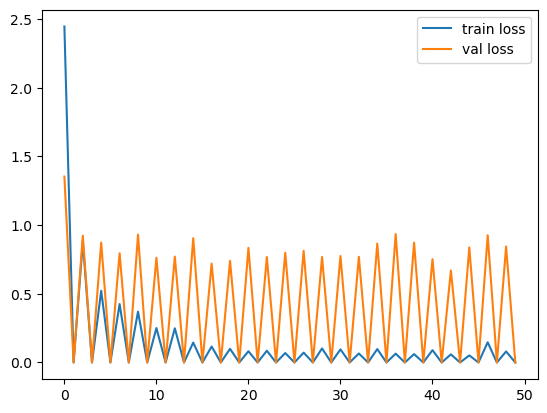

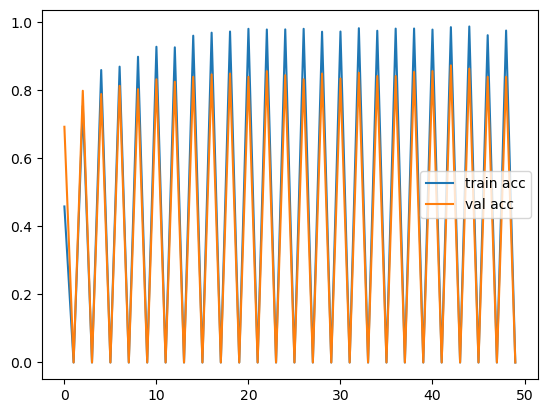

<Figure size 640x480 with 0 Axes>

In [38]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
label_mapping = {i: label for i, label in enumerate(sorted(os.listdir(rootdir)))}

In [40]:
label_mapping

{0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Green',
 2: 'Amaranthus Red',
 3: 'Amaranthus Viridis (Arive-Dantu)',
 4: 'Artocarpus Heterophyllus (Jackfruit)',
 5: 'Azadirachta Indica (Neem)',
 6: 'Balloon vine',
 7: 'Basella Alba (Basale)',
 8: 'Black Night Shade',
 9: 'Brassica Juncea (Indian Mustard)',
 10: 'Carissa Carandas (Karanda)',
 11: 'Citrus Limon (Lemon)',
 12: 'Coriander Leaves',
 13: 'Country Mallow',
 14: 'Crown flower',
 15: 'Dwarf Copperleaf (Green)',
 16: 'Dwarf copperleaf (Red)',
 17: 'Ficus Auriculata (Roxburgh fig)',
 18: 'Ficus Religiosa (Peepal Tree)',
 19: 'Giant Pigweed',
 20: 'Gongura',
 21: 'Hibiscus Rosa-sinensis',
 22: 'Holy Basil',
 23: 'Indian Sarsaparilla',
 24: 'Indian Stinging Nettle',
 25: 'Indian Thornapple',
 26: 'Indian pennywort',
 27: 'Indian wormwood',
 28: 'Ivy Gourd',
 29: 'Jasminum (Jasmine)',
 30: 'Kokilaksha',
 31: 'Mangifera Indica (Mango)',
 32: 'Mentha (Mint)',
 33: 'Moringa Oleifera (Drumstick)',
 34: 'Muntingia Calabura (Jamaica Cherr

In [41]:
image_path = 'Segmented Medicinal Leaf Images/Segmented Medicinal Leaf Images/Brassica Juncea (Indian Mustard)/BJ-S-003.jpg'

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('vgg16model-2.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    
    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]
    
    return predicted_label, confidence

# Provide the path to the image you want to classify
predicted_label, confidence = predict_plant(image_path, label_mapping)

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
Predicted Label: Brassica Juncea (Indian Mustard)
Confidence: 1.00
